In [1]:
from matplotlib.pyplot import figure, rcParams
from conf_matplotlib import conf_matplotlib_claro, conf_matplotlib_oscuro
conf_matplotlib_oscuro()

In [2]:
from pandas import read_csv
from datetime import datetime

In [3]:
def rate(data):
    from numpy import where
    i = where(data > 0)[0][0]
    pre_data = data[i:-1]
    pos_data = data[i+1:]
    new_data = pos_data/pre_data
    
    return new_data

def new(data):
    from numpy import where
    i = where(data > 0)[0][0]
    pre_data = data[i:-1]
    pos_data = data[i+1:]
    new_data = pos_data - pre_data
    
    return new_data

In [4]:
data = read_csv("/Users/roberto/Mexico-COVID-19/Mexico_COVID19_CTD.csv")

d_pos = data["Pos"].to_numpy()
d_sus = data["Susp"].to_numpy()
d_tot = data["Tested_tot"].to_numpy()
d_fec = [datetime.strptime(fecha, "%Y-%m-%d") for fecha in data["Fecha"].to_numpy()]

d_cam = rate(d_pos)
d_nue = new(d_pos)

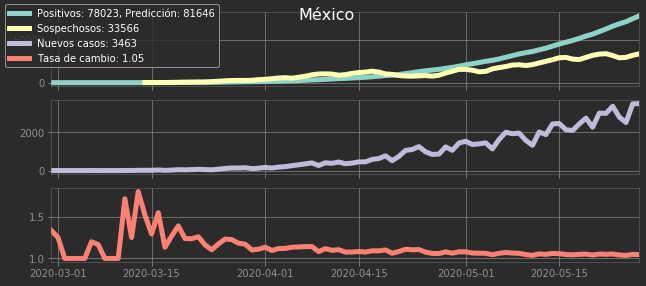

In [5]:
fig = figure(figsize=(9,4))
ax1, ax2, ax3 = fig.subplots(3,1, sharex=True)

cycle = rcParams['axes.prop_cycle'].by_key()['color']

lbl_pos = f"Positivos: {d_pos[-1]}, Predicción: {int(d_pos[-1]*d_cam[-1])}"
lbl_sus = f"Sospechosos: {int(d_sus[-1])}"
lbl_cam = f"Tasa de cambio: {round(d_cam[-1], 2)}"
lbl_nue = f"Nuevos casos: {d_nue[-1]}"
ax1.plot(d_fec, d_pos, c=cycle[0], label=lbl_pos)
ax1.plot(d_fec, d_sus, c=cycle[1], label=lbl_sus)
ax2.plot(d_fec[-len(d_nue):], d_nue, c=cycle[2], label=lbl_nue)
ax3.plot(d_fec[-len(d_cam):], d_cam, c=cycle[3], label=lbl_cam)
ax3.set_xlim(d_fec[-len(d_cam)], d_fec[-1])

fig.legend(loc="upper left")
fig.tight_layout()
fig.suptitle("México", fontsize=16);

In [6]:
d_pos = data["CMX"].to_numpy()
d_sus = data["CMX_S"].to_numpy()
d_tot = data["CMX"].to_numpy()
d_fec = [datetime.strptime(fecha, "%Y-%m-%d") for fecha in data["Fecha"].to_numpy()]

d_cam = rate(d_pos)
d_nue = new(d_pos)

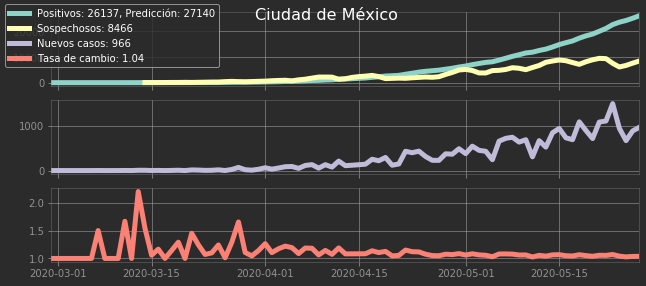

In [7]:
fig = figure(figsize=(9,4))
ax1, ax2, ax3 = fig.subplots(3,1, sharex=True)

cycle = rcParams['axes.prop_cycle'].by_key()['color']

lbl_pos = f"Positivos: {d_pos[-1]}, Predicción: {int(d_pos[-1]*d_cam[-1])}"
lbl_sus = f"Sospechosos: {int(d_sus[-1])}"
lbl_cam = f"Tasa de cambio: {round(d_cam[-1], 2)}"
lbl_nue = f"Nuevos casos: {d_nue[-1]}"
ax1.plot(d_fec, d_pos, c=cycle[0], label=lbl_pos)
ax1.plot(d_fec, d_sus, c=cycle[1], label=lbl_sus)
ax2.plot(d_fec[-len(d_nue):], d_nue, c=cycle[2], label=lbl_nue)
ax3.plot(d_fec[-len(d_cam):], d_cam, c=cycle[3], label=lbl_cam)
ax3.set_xlim(d_fec[-len(d_cam)], d_fec[-1])

fig.legend(loc="upper left")
fig.tight_layout()
fig.suptitle("Ciudad de México", fontsize=16);